In [1]:
import pandas as pd


In [2]:
df= pd.read_csv('mergedall.csv')

In [3]:
df.shape


(2710, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710 entries, 0 to 2709
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           2710 non-null   object 
 1   Area(In Sq.Feet)  2710 non-null   float64
 2   Road              2710 non-null   float64
 3   Price(Float)      2710 non-null   int64  
 4   Bedroom           2710 non-null   int64  
 5   Bathroom          2710 non-null   float64
 6   Face              2710 non-null   object 
 7   Floors            2710 non-null   float64
 8   City              2710 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 190.7+ KB


In [5]:
df.rename(columns = {'Area(In Sq.Feet)':'Area', 'Price(Float)':'Price'},inplace = True)

In [6]:
df

,Address,Area,Road,Price,Bedroom,Bathroom,Face,Floors,City
0,Sunar gaun,1711.2500,2.0,27000000,13,3.5,North,5.0,Kathmandu
1,"Tarkeshwor-04, Sesmati",1647.0700,3.0,12000000,1,1.0,West,1.0,Kathmandu
2,Thankot,1369.0000,3.0,11000000,10,3.0,East,2.0,Kathmandu
3,Imadol,1796.8125,4.0,12000000,4,1.0,North East,1.5,Lalitpur
4,Kadaghari,855.6250,4.0,7500000,3,1.0,North,1.0,Kathmandu
...,...,...,...,...,...,...,...,...,...
2705,Bhaisepati,1437.4500,40.0,55000000,3,4.0,South East,2.5,Lalitpur
2706,Shankhamul,1026.7500,42.0,51000000,1,6.0,West,5.5,Kathmandu
2707,Gokarna,1818.2000,44.0,25000000,8,3.0,East,2.5,Kathmandu
2708,Ekantakuna,1711.2500,45.0,36000000,6,3.0,South,2.5,Lalitpur


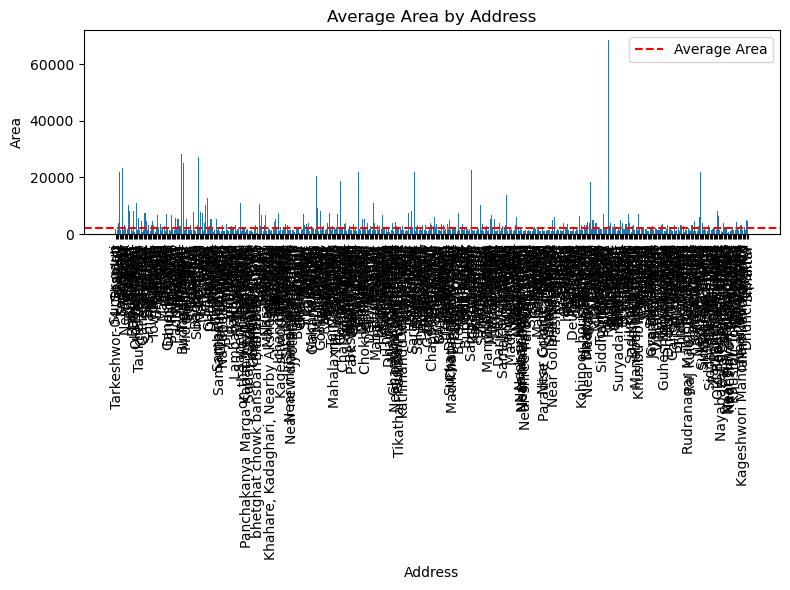

In [7]:
import matplotlib.pyplot as plt
# Calculate the average area
average_area = df['Area'].mean()

# Plot the graph
plt.figure(figsize=(8, 6))
plt.bar(df['Address'], df['Area'])
plt.axhline(y=average_area, color='r', linestyle='--', label='Average Area')
plt.xticks(rotation=90)
plt.xlabel('Address')
plt.ylabel('Area')
plt.title('Average Area by Address')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
df1 = df.copy()

In [9]:
df1['price_per_sqft'] = df1['Price']/df1['Area']

In [10]:
df1['price_per_sqft'].mean()
print("Average price of house per square fit :",df1['price_per_sqft'].mean() )

Average price of house per square fit : 22929.57775046658


In [11]:
df1['Area'].mean()

2106.6441066372695

In [12]:
df.mean()

C:\Users\Abiral\AppData\Local\Temp\ipykernel_22700\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Area        2.106644e+03
Road        1.508447e+01
Price       4.201011e+07
Bedroom     5.469373e+00
Bathroom    4.026015e+00
Floors      2.768210e+00
dtype: float64

In [12]:
len(df.Address.unique())

499

In [13]:
Adress_stats = df1.groupby("Address")['Address'].agg('count').sort_values(ascending=False)
Adress_stats

Address
Imadol               231
Budhanilkantha       216
Bhaisepati           100
Kapan                 56
Sitapaila             55
                    ... 
Lambagar, Sesmati      1
Lambagar               1
Lainchaur              1
Lagankhel              1
umang chowk            1
Name: Address, Length: 499, dtype: int64

In [14]:
len(Adress_stats[Adress_stats<5])

387

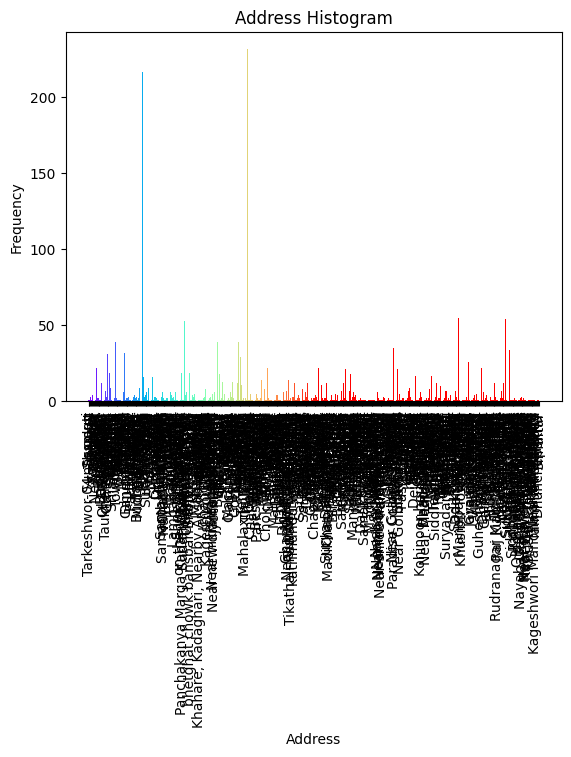

In [15]:
import matplotlib.pyplot as plt

# Get the unique addresses and their frequencies
addresses = df['Address'].unique()
frequencies = df['Address'].value_counts().sort_index()

# Generate a unique color for each address
colors = plt.cm.rainbow(range(len(addresses)))

# Plot the histogram
plt.bar(addresses, frequencies, color=colors)

# Customize the plot
plt.title("Address Histogram")
plt.xlabel("Address")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

# Display the plot
plt.show()


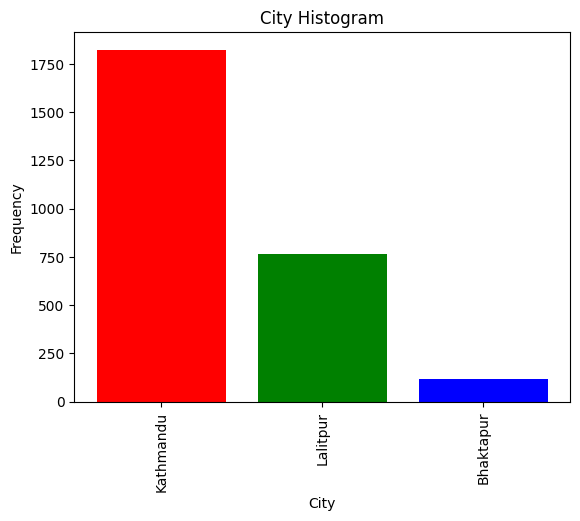

In [16]:
import matplotlib.pyplot as plt

# Get the unique addresses and their frequencies
city = df['City'].unique()
city_frequencies = df['City'].value_counts()

# Define colors for each city
colors = ['red', 'green', 'blue']  # Add more colors if needed

# Plot the histogram
plt.bar(range(len(city)), city_frequencies, color=colors)

# Customize the plot
plt.title("City Histogram")
plt.xlabel("City")
plt.ylabel("Frequency")
plt.xticks(range(len(city)), city, rotation=90)

# Display the plot
plt.show()


In [17]:
# Get the unique addresses and their frequencies
city = df['City'].unique()
city_frequencies = df['City'].value_counts().sort_index()

In [18]:
city

array(['Kathmandu', 'Lalitpur', 'Bhaktapur'], dtype=object)

In [38]:
city_frequencies

City
Bhaktapur     119
Kathmandu    1824
Lalitpur      767
Name: count, dtype: int64

In [2]:
df1


NameError: name 'df1' is not defined

ValueError: could not convert string to float: 'Sunar gaun'

In [21]:
df2= df.drop(columns=['City','Address','Face'])

In [22]:
# Assuming the DataFrame is named 'df' with the given column names
correlation_matrix = df2.corr()

# Display the correlation matrix
print(correlation_matrix)

              Area      Road     Price   Bedroom  Bathroom    Floors
Area      1.000000  0.091380  0.244699  0.048363  0.132917  0.018421
Road      0.091380  1.000000  0.082630  0.047844  0.116103  0.111390
Price     0.244699  0.082630  1.000000  0.061513  0.145637  0.150447
Bedroom   0.048363  0.047844  0.061513  1.000000  0.599592  0.476691
Bathroom  0.132917  0.116103  0.145637  0.599592  1.000000  0.444025
Floors    0.018421  0.111390  0.150447  0.476691  0.444025  1.000000


In [50]:
oldf = pd.read_csv('dataset_without_outliers.csv')

In [51]:
oldf_temp = oldf.drop(columns=['Address',"City",'Face'])
oldf_temp =oldf_temp.rename(columns={'Price(Float)': 'Price', 'Area(In Sq.Feet)': 'Area'})


In [52]:
corr_matrix = oldf_temp.corr()
print(corr_matrix)

              Area      Road     Price   Bedroom  Bathroom    Floors
Area      1.000000  0.163743  0.713558  0.110246  0.295609  0.042020
Road      0.163743  1.000000  0.220265 -0.079333  0.124703 -0.026285
Price     0.713558  0.220265  1.000000  0.097888  0.395295  0.075718
Bedroom   0.110246 -0.079333  0.097888  1.000000  0.303547  0.292343
Bathroom  0.295609  0.124703  0.395295  0.303547  1.000000  0.278647
Floors    0.042020 -0.026285  0.075718  0.292343  0.278647  1.000000


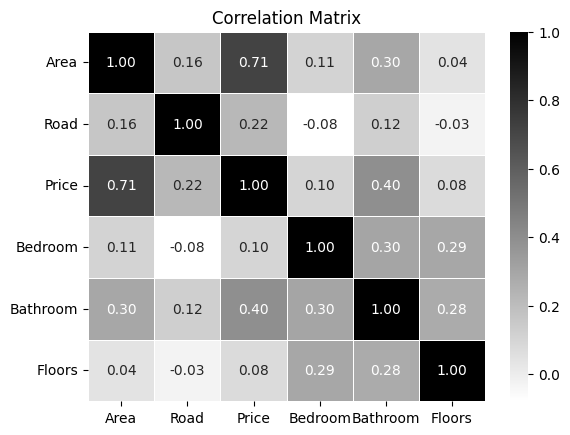

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = oldf_temp.corr()

# Set color palette to black and white
cmap = sns.color_palette("binary", as_cmap=True)

# Create heatmap with black and white color scheme
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
# Save the plot as a PNG image file
plt.savefig("correlation_matrix.png", dpi=300)

plt.show()


<Figure size 640x480 with 0 Axes>